In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chisquare
from sklearn.utils import resample


In [3]:
df = pd.read_csv("random_numbers.csv", header=None, sep=";", engine='python')
values = df.iloc[:, 1].dropna().astype(int)


Total number of draw : 298


/var/folders/1r/qsm406yn7ggg3tk0c4nl_y_m0000gn/T/ipykernel_39661/2631793957.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=values, order=range(1, 11), palette="pastel")


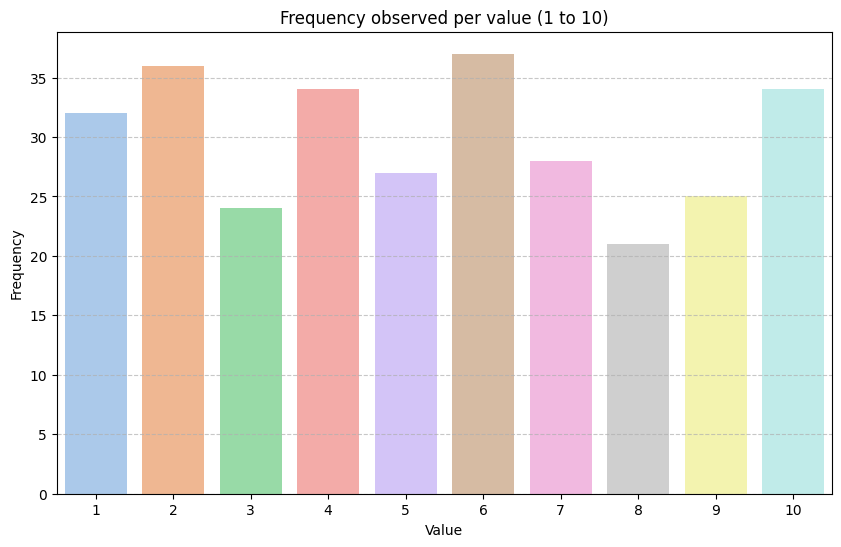

In [4]:
print(f"Total number of draw : {len(values)}")

# frequency histogram
plt.figure(figsize=(10, 6))
sns.countplot(x=values, order=range(1, 11), palette="pastel")
plt.title("Frequency observed per value (1 to 10)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
# chi2 test
observed_counts = values.value_counts().sort_index()
expected_counts = [len(values)/10] * 10  # expectation under H0 : uniform

chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"chi¨2 : {chi2_stat:.2f}")
print(f"P-value : {p_value:.4f}")
if p_value < 0.05:
    print("→ Reject of H0 : distribution probably not uniform.")
else:
    print("→ We don't reject H0 : The distribution may be uniform.")


chi¨2 : 9.25
P-value : 0.4147
→ We don't reject H0 : The distribution may be uniform.


In [6]:
#Boostrap and CI
bootstrap_results = []
for _ in range(1000):
    sample = resample(values)
    freq = pd.value_counts(sample, sort=False, normalize=True).reindex(range(1, 11), fill_value=0)
    bootstrap_results.append(freq.values)

bootstrap_array = np.array(bootstrap_results)
conf_intervals = np.percentile(bootstrap_array, [2.5, 97.5], axis=0)


/var/folders/1r/qsm406yn7ggg3tk0c4nl_y_m0000gn/T/ipykernel_39661/689210043.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq = pd.value_counts(sample, sort=False, normalize=True).reindex(range(1, 11), fill_value=0)


ValueError: 'yerr' must not contain negative values

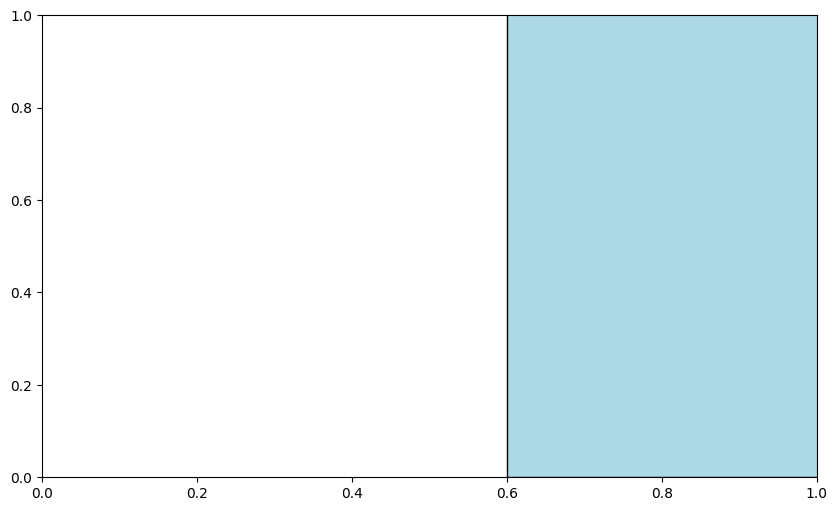

In [8]:
import numpy as np

mean_freq = values.value_counts().sort_index().reindex(range(1, 11), fill_value=0)
x = range(1, 11)

# Compute symmetric errors (assuming conf_intervals is [lower_bound, upper_bound])
yerr_lower = np.abs(mean_freq - conf_intervals[0])
yerr_upper = np.abs(conf_intervals[1] - mean_freq)

plt.figure(figsize=(10, 6))
plt.bar(x, mean_freq, yerr=[yerr_lower, yerr_upper],
        capsize=5, color='lightblue', edgecolor='black')
plt.xticks(x)
plt.title("Observed frequencies with bootstrap CI (95%)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()